# A simple feed forward model

```




```
#### contents
- [Read data](#Read-data)
- [Prepare data](#Prepare-data)
- [Create and train model](#Create-and-train-model)
- [Final note](#Final-note)

In [1]:
import os
import sys
import json
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
MODULES_PATH = '../modules'
MODELS_PATH = '../models'
DATA_PATH = '../data'

sys.path.append(MODULES_PATH)
from data import prepare_training_data, prepare_test_data
from models import simple_ffn, parameter_ffn_seq, parameter_ffn

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8408503821468905287
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951913267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8186906721746063966
physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## Read data

- [contents](#contents)

In [4]:
with open(os.path.join(DATA_PATH, 'train_data.pickle'),'rb') as datafile:
        corpora_train, labels_train = pickle.load(datafile)

## Prepare data

- [contents](#contents)

In [5]:
with open(os.path.join(DATA_PATH, 'pipeline_instance.pickle'),'rb') as datafile:
        pipeline_instance = pickle.load(datafile)

In [6]:
X_train, y_train = prepare_test_data(corpora_train, labels_train, pipeline_instance)

## Create and train model

- [contents](#contents)

In [7]:
with open(os.path.join(MODELS_PATH, 'best_params.json'), 'r') as datafile:
    best_params = json.load(datafile)

In [8]:
model = parameter_ffn_seq(**best_params)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              5515264   
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
__________

In [9]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=50)
mc = ModelCheckpoint(os.path.join(MODELS_PATH, 'simple_ffn_model.h5'), 
                     monitor='val_acc', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

In [10]:
history = model.fit(X_train, y_train, epochs=5000, validation_split=0.1, verbose=2, batch_size=1024, callbacks=[es, mc])

Train on 27375 samples, validate on 3042 samples
Epoch 1/5000
 - 3s - loss: 0.9795 - acc: 0.6866 - val_loss: 0.3784 - val_acc: 0.8820

Epoch 00001: val_acc improved from -inf to 0.88199, saving model to ../models\simple_ffn_model.h5
Epoch 2/5000
 - 1s - loss: 0.3675 - acc: 0.8797 - val_loss: 0.3112 - val_acc: 0.9040

Epoch 00002: val_acc improved from 0.88199 to 0.90401, saving model to ../models\simple_ffn_model.h5
Epoch 3/5000
 - 1s - loss: 0.3025 - acc: 0.9018 - val_loss: 0.2849 - val_acc: 0.9119

Epoch 00003: val_acc improved from 0.90401 to 0.91190, saving model to ../models\simple_ffn_model.h5
Epoch 4/5000
 - 1s - loss: 0.2626 - acc: 0.9151 - val_loss: 0.2685 - val_acc: 0.9109

Epoch 00004: val_acc did not improve from 0.91190
Epoch 5/5000
 - 1s - loss: 0.2379 - acc: 0.9193 - val_loss: 0.2652 - val_acc: 0.9172

Epoch 00005: val_acc improved from 0.91190 to 0.91716, saving model to ../models\simple_ffn_model.h5
Epoch 6/5000
 - 1s - loss: 0.2183 - acc: 0.9272 - val_loss: 0.2542 - v


Epoch 00055: val_acc did not improve from 0.92768
Epoch 56/5000
 - 1s - loss: 0.1035 - acc: 0.9625 - val_loss: 0.2537 - val_acc: 0.9241

Epoch 00056: val_acc did not improve from 0.92768
Epoch 57/5000
 - 1s - loss: 0.1027 - acc: 0.9629 - val_loss: 0.2545 - val_acc: 0.9247

Epoch 00057: val_acc did not improve from 0.92768
Epoch 58/5000
 - 1s - loss: 0.1044 - acc: 0.9618 - val_loss: 0.2554 - val_acc: 0.9257

Epoch 00058: val_acc did not improve from 0.92768
Epoch 59/5000
 - 1s - loss: 0.1038 - acc: 0.9616 - val_loss: 0.2532 - val_acc: 0.9247

Epoch 00059: val_acc did not improve from 0.92768
Epoch 60/5000
 - 1s - loss: 0.1025 - acc: 0.9624 - val_loss: 0.2538 - val_acc: 0.9250

Epoch 00060: val_acc did not improve from 0.92768
Epoch 61/5000
 - 1s - loss: 0.1025 - acc: 0.9628 - val_loss: 0.2548 - val_acc: 0.9250

Epoch 00061: val_acc did not improve from 0.92768
Epoch 62/5000
 - 1s - loss: 0.1031 - acc: 0.9624 - val_loss: 0.2544 - val_acc: 0.9250

Epoch 00062: val_acc did not improve fro

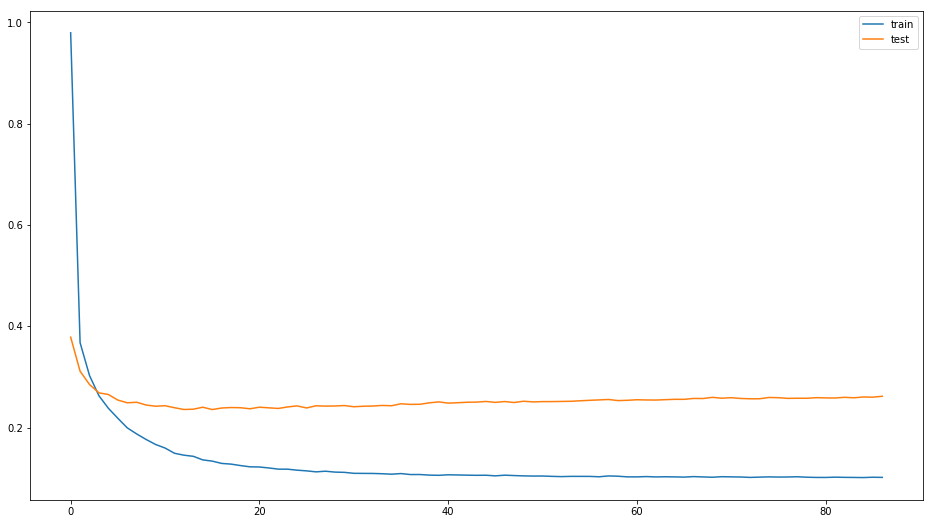

In [13]:
# loss
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

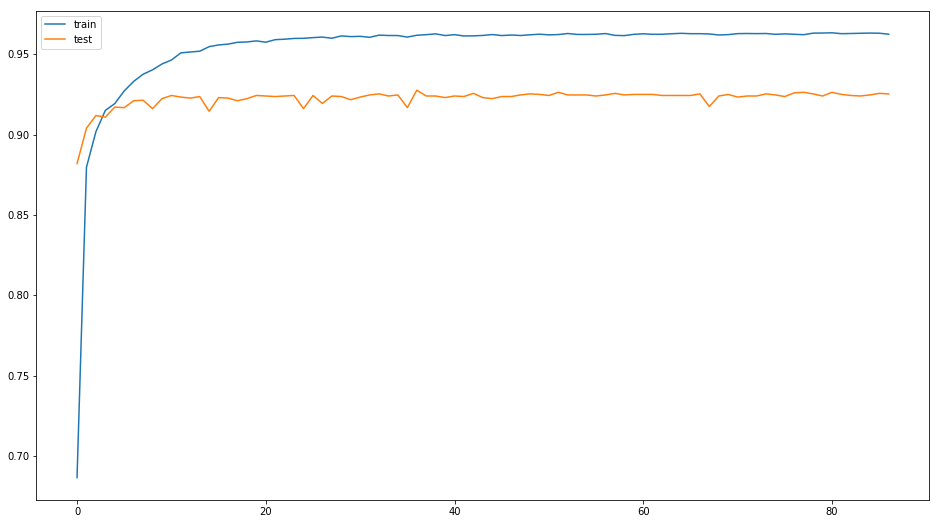

In [15]:
# accuracy
plt.figure(figsize=(16,9))
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

## Final note

- [contents](#contents)